In [1]:
import pandas as pd

df = pd.read_csv('./datas/iris3.csv')

In [2]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


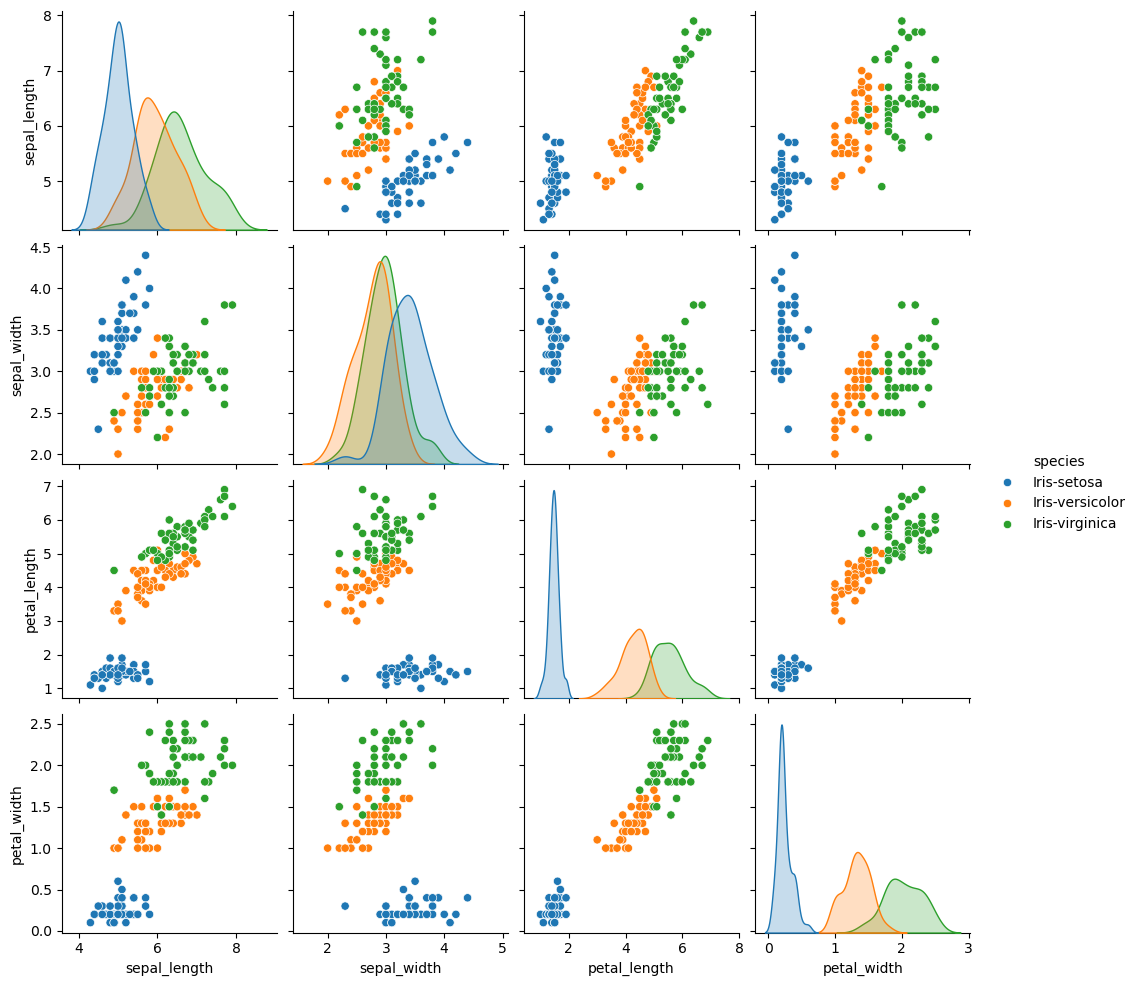

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.pairplot(df, hue= 'species')
plt.show()

In [4]:
# ONE-HOT ENCODING
X = df.iloc[:,0:4]
y = df.iloc[:,4]

print(X[0:5])
print(y[0:5])

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


In [5]:
y = pd.get_dummies(y)

In [6]:
print(y[0:5])

   Iris-setosa  Iris-versicolor  Iris-virginica
0         True            False           False
1         True            False           False
2         True            False           False
3         True            False           False
4         True            False           False


In [9]:
# softmax 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=4, activation = 'relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X,y ,epochs=30, batch_size= 5)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 12)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191 (764.00 B)

 Trainable params: 191 (764.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2854 - loss: 2.2897 
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3606 - loss: 1.2211 
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2410 - loss: 1.0886 
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3464 - loss: 1.0171 
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5769 - loss: 0.9652 
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6655 - loss: 0.9156 
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5116 - loss: 0.8891 
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5167 - loss: 0.8362 
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4355 - loss: 0.8040 
Epoch 10/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4583 - loss: 0.7728 
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5224 - loss: 0.7126 
Epoch 12/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 

In [10]:
score = model.evaluate(X,y )
print('Test Accuracy:', score[1])
print('Test Loss', score[0])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9737 - loss: 0.2561  
Test Accuracy: 0.9666666388511658
Test Loss 0.35586705803871155
